# <center>基于朴素贝叶斯的情感分析</center>

## 一、需求分析

* 背景：互联网外卖以服务、快捷为卖点，用户的评论与反馈对商家、平台都很重要。


* 功能：本文根据数据中的评论，采用朴素贝叶斯算法来分析用户情感，将用户评论划分为“好评”，“差评”。


* 数据来源：数据来自和鲸社区，[12k条外卖用户评价](https://www.kesci.com/mw/dataset/5e61feefb8dfce002d8031fa/content)。

## 二、设计

### 2.1 算法原理

#### 贝叶斯定理

贝叶斯定理是一个计算条件概率的公式。通过已知概率计算未知的概率，比如我们记A的概率是P(A),B的概率是P(B),则P(A|B)表示观察到事件B发生时，事件A发生的概率，其数学表达式以及贝叶斯本人如下：

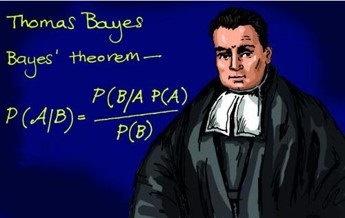
<center>图片不一定是贝叶斯本人:)</center>

### 朴素贝叶斯分类法

朴素贝叶斯分类法是基于贝叶斯定理和特征条件独立假设的分类方法，它通过特征计算分类的概率，选取概率大的情况，是基于概率论的一种机器学习分类（监督学习）方法，被广泛应用于情感分类领域的分类器。
朴素贝叶斯算法可以用一句话来概括：贝叶斯定理+条件独立假设。条件独立假设指的是：在解决分类问题时，会选取很多数据特征，为了降低计算复杂度，假设数据各个维度的特征相互独立。

## 三、实现

* 标准库/扩展库的使用

In [5]:
from bayes import Bayes
import jieba
import pandas as pd
from numpy import *

1. 朴素贝叶斯模块并没有使用IPython官方库的bayes模块，而是使用GitHub用户stevewang0提供的替换库。下载地址：[MLInAction](https://github.com/stevewang0/MLInAction)。

   **使用该库的原因是它比官方提供的库更为简洁，代码以及其能实现的功能非常明确，适合像我这种机器学习入门新手。**
   
   
      （对该py文件我会在另一个Jupyter Notebook文档中详细说明，这一部分很关键，它是本文实现贝叶斯分类器的核心。）

2. jieba库的使用在本小组创建的《文本挖掘基础知识》中文分词模块有详细说明，这里不再赘述。


3. pandas的运用详情见一篇CSDN博客：[《import pandas as pd什么意思》](https://blog.csdn.net/weixin_39854681/article/details/110620569)。


4. NumPy包的核心是ndarray对象。它封装了n维同类数组。很多运算是由编译过的代码来执行的，以此来提高效率。

* 分词

In [6]:
# 1. 创建停用词list
def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(filepath,'r',encoding='utf-8').readlines()]
    return stopwords

In [7]:
# 2. 对句子进行分词
def wordCut(sentence):
    words = jieba.cut(sentence.strip())
    stopwords = stopwordslist('cn_stopwords.txt') # 这里加载停用词的路径
    outstr = []
    for word in words:
        if word not in stopwords:
            if word != '\t':
                outstr.append(word)
    return outstr

* 构造词语列表

In [8]:
def DataHandle(filename,flag):
    out = []
    lines = pd.read_table(filename,header=None,encoding='utf-8',names=['评论'])
    for line in lines['评论']:
        line = str(line)
        outStr = wordCut(line) # 这里的返回值是字符串
        out.append(outStr)

    if flag:
        Vec = [1] * lines.shape[0]
    else:
        Vec = [0] * lines.shape[0]

    return Vec, out

* 糅合好评与差评

In [9]:
if __name__ == '__main__':
    goodDataPath = 'good.txt'
    badDataPath = 'bad.txt'

    # 1 好评    0 差评
    goodVec, goodList = DataHandle(goodDataPath, 1)
    badVec, badList = DataHandle(badDataPath, 0)

    listClasses = goodVec + badVec
    listOPosts = goodList + badList

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\liang\AppData\Local\Temp\jieba.cache
Loading model cost 0.400 seconds.
Prefix dict has been built successfully.


* 构造词表
  
  获取训练集中所有不重复的词语构成列表

In [10]:
myVocabList = Bayes.createVocabList(listOPosts)

* 计算单词是否出现并创建数据矩阵

In [11]:
    trainMat = []
    for postinDoc in listOPosts:
        trainMat.append(Bayes.setOfWords2Vec(myVocabList, postinDoc))

* 训练数据

In [ ]:
p0V, p1V, pAb = Bayes.trainNB0(array(trainMat), array(listClasses))

* 测试数据

In [ ]:
    while True:
        inputS = input(u'请输入您对本商品的评价：')

        testEntry = wordCut(inputS)
        thisDoc = array(Bayes.setOfWords2Vec(myVocabList, testEntry))
        print('评价: ', Bayes.classifyNB(thisDoc, p0V, p1V, pAb))

请输入您对本商品的评价：服务挺不错的
评价:  1
请输入您对本商品的评价：个人觉得性价比很高
评价:  1
请输入您对本商品的评价：服务员态度非常恶劣
评价:  0
请输入您对本商品的评价：吃完就拉肚子，差评
评价:  0


## 四、小结

贝叶斯决策论在机器学习、模式识别等诸多关注数据分析的领域都有极为重要的地位.对贝叶斯定理进行近似求解,为机器学习算法的设计提供了一个有效途径.为避免贝叶斯定理求解时面临的组合爆炸、样本稀疏问题，朴素贝叶斯分类器引入了**属性条件独立性假设**.这个假设在现实应用中往往很难成立，但有趣的是，朴素贝叶斯分类器在很多情形下都能获得相当好的性能.一种解释是对分类任务来说，只需各类别的条件概率排序正确、无需精确概率值即可导致正确分类结果；另一种解释是，若属性间依赖对所有的类别影响相同，或依赖关系的影响能相互抵消，则属性条件独立性假设在降低计算开销的同时不会对性能产生负面影响.朴素贝叶斯分类器在信息检索领域尤为常用，比如文本分类，而文本分类就包括了情感分析.


--

节选自周克华《机器学习》（也名《西瓜书》）164页.